In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#Get street data
#Spatial join to block group
s = gpd.read_file('SeattleData/Sidewalks/Sidewalks.shp')
s

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry
0,1,328242,97,9309,SDW-30390,SDW,"BOREN AVE BETWEEN JEFFERSON ST AND JAMES ST, N...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,MONO,INSVC,2010-07-31,TR/PCC,60,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.3,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.226600,"LINESTRING (-122.32182 47.60587, -122.32237 47..."
1,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
2,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
3,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
4,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46189,46251,292312,97,8645,SDW-3113,SDW,9 UPPER AVE W BETWEEN W GALER ST AND W BLAINE ...,SW DATA LOAD,2007-09-26,None,None,None,410C,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,854.528595,"LINESTRING (-122.36912 47.63237, -122.36907 47..."
46190,46252,290185,97,3506,SDW-1055,SDW,23RD PL NE BETWEEN NE 133RD ST AND NE 135TH ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,2017-07-26,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT5,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,633.069791,"LINESTRING (-122.30332 47.72479, -122.30339 47..."
46191,46253,290665,97,4808,SDW-1158,SDW,31ST AVE NE BETWEEN NE 130TH ST AND NE 133RD S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,2017-07-26,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT5,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,631.226787,"LINESTRING (-122.29468 47.72294, -122.29468 47..."
46192,46254,313714,97,4700,SDW-18526,SDW,30TH AVE S BETWEEN S FERDINAND ST AND S DAWSON...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,

In [3]:
s_clean = s.dropna(subset=['geometry'])

In [4]:
s_clean = s_clean.drop_duplicates(subset=['geometry'])

In [5]:
s_clean 

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry
0,1,328242,97,9309,SDW-30390,SDW,"BOREN AVE BETWEEN JEFFERSON ST AND JAMES ST, N...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,MONO,INSVC,2010-07-31,TR/PCC,60,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.3,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.226600,"LINESTRING (-122.32182 47.60587, -122.32237 47..."
1,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
2,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
3,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
4,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46189,46251,292312,97,8645,SDW-3113,SDW,9 UPPER AVE W BETWEEN W GALER ST AND W BLAINE ...,SW DATA LOAD,2007-09-26,None,None,None,410C,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,854.528595,"LINESTRING (-122.36912 47.63237, -122.36907 47..."
46190,46252,290185,97,3506,SDW-1055,SDW,23RD PL NE BETWEEN NE 133RD ST AND NE 135TH ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,2017-07-26,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT5,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,633.069791,"LINESTRING (-122.30332 47.72479, -122.30339 47..."
46191,46253,290665,97,4808,SDW-1158,SDW,31ST AVE NE BETWEEN NE 130TH ST AND NE 133RD S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,2017-07-26,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT5,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,631.226787,"LINESTRING (-122.29468 47.72294, -122.29468 47..."
46192,46254,313714,97,4700,SDW-18526,SDW,30TH AVE S BETWEEN S FERDINAND ST AND S DAWSON...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,

In [6]:
s_clean['OBJECTID'].nunique()

46072

In [7]:
labels = pd.read_csv("SeattleData/access_attributes.csv")
labels.head()

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.32030,3.0,False,0,0,1
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.32189,1.0,False,2,0,0
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.32210,1.0,False,2,1,0
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.32017,1.0,False,1,0,0
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.32120,1.0,False,2,0,0


In [8]:
#create labels geo dataframe
labels = labels.rename(columns={'Attribute Latitude': 'latitude', 'Attribute Longitude': 'longtitude'})
points = labels.apply(lambda row: Point(row.longtitude, row.latitude), axis=1)
labels_geo = gpd.GeoDataFrame(labels, geometry=points)
labels_geo.crs = {'init': 'epsg:4326'}
labels_geo

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,latitude,longtitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count,geometry
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1,POINT (-122.32030 47.64312)
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0,POINT (-122.32189 47.64326)
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.322100,1.0,False,2,1,0,POINT (-122.32210 47.64312)
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0,POINT (-122.32017 47.64315)
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.321200,1.0,False,2,0,0,POINT (-122.32120 47.65138)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93757,59103771,Crosswalk,3338,6394365,Greenwood,47.686950,-122.360530,5.0,False,4,0,0,POINT (-122.36053 47.68695)
93758,59103773,Crosswalk,25421,465991369,Greenwood,47.690610,-122.356500,1.0,False,4,0,0,POINT (-122.35650 47.69061)
93759,59103776,Crosswalk,25422,465991369,Greenwood,47.690613,-122.356804,1.0,False,4,0,0,POINT (-122.35680 47.69061)
93760,59103777,Crosswalk,5047,6428527,Greenwood,47.686222,-122.357050,1.0,False,4,0,0,POINT (-122.35705 47.68622)


In [9]:
labels_geo = labels_geo.to_crs(4326)

In [10]:
labels_per_street = labels_geo.sjoin_nearest(s_clean)

In [11]:
labels_per_street.head()

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,latitude,longtitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1,POINT (-122.32030 47.64312),27064,27065,311888,97,14727,SDW-15994,SDW,E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2007-09-26,LSCP,53,None,72,None,None,SR1146066,2021-08-27,PARK,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.7,0,2017-07-12,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,169.539271
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0,POINT (-122.32189 47.64326),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
35,57259744,NoSidewalk,12051,13521798,Portage Bay,47.643270,-122.321465,3.0,False,0,0,0,POINT (-122.32146 47.64327),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46714,57259940,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321280,3.0,False,1,1,0,POINT (-122.32128 47.64327),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70319,57259979,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321540,3.0,False,0,1,1,POINT (-122.32154 47.64327),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568


In [ ]:
#here join all labels to streets first

In [12]:
problems = labels_per_street.loc[(labels_per_street['Label Type'] == 'NoCurbRamp') |(labels_per_street['Label Type'] == 'NoSidewalk')|(labels_per_street['Label Type'] == 'SurfaceProblem') |(labels_per_street['Label Type'] == 'Obstacle') |(labels_per_street['Label Type'] == 'Occlusion') ] 

In [13]:
problems = problems.loc[problems['Disagree Count'] == 0]

In [14]:
problems['Severity'].value_counts(dropna=False)

3.0    14392
4.0    11215
5.0    10297
2.0     4977
1.0     3325
NaN     1466
Name: Severity, dtype: int64

In [15]:
problems = problems.dropna(subset=['Severity'])

In [16]:
problems = problems.rename(columns={'Severity': 'WeightedCount'})
problems

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,latitude,longtitude,WeightedCount,Temporary,Agree Count,Disagree Count,Not Sure Count,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
35,57259744,NoSidewalk,12051,13521798,Portage Bay,47.643270,-122.321465,3.0,False,0,0,0,POINT (-122.32146 47.64327),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70352,57260095,NoCurbRamp,23988,428224938,Portage Bay,47.643270,-122.320960,3.0,False,1,0,0,POINT (-122.32096 47.64327),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46752,57260091,NoCurbRamp,23959,428222729,Portage Bay,47.643147,-122.322120,3.0,False,2,0,0,POINT (-122.32212 47.64315),27068,27069,311892,97,14725,SDW-15998,SDW,E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-07-18,NONE,INSVC,2010-07-31,NONE,0,None,94,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,DISTRICT4,N,None,3.0,2.0,0,2017-07-18,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,299.397841
53,57259976,SurfaceProblem,6732,6456858,Portage Bay,47.651070,-122.320990,2.0,False,1,0,0,POINT (-122.32099 47.65107),17709,17710,302429,97,10578,SDW-13290,SDW,FUHRMAN AVE E BETWEEN FRANKLIN AVE E AND EASTL...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2010-07-31,PCC,138,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.1,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,295.848429
70318,57259978,SurfaceProblem,6732,6456858,Portage Bay,47.650830,-122.320786,2.0,False,1,0,1,POINT (-122.32079 47.65083),17709,17710,302429,97,10578,SDW-13290,SDW,FUHRMAN AVE E BETWEEN FRANKLIN AVE E AND EASTL...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2010-07-31,PCC,138,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.1,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,295.848429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93719,59103599,NoCurbRamp,8655,6488959,Greenwood,47.687004,-122.355130,3.0,False,0,0,1,POINT (-122.35513 47.68700),21151,21152,305985,97,15891,SDW-13462,SDW,N 80TH ST BETWEEN GREENWOOD AVE N AND DAYTON A...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-26,410C,INSVC,2007-09-26,LSCP,28,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT6,None,N,None,3.0,3.9,0,2017-07-26,None,None,None,None,BLOCK,N,SSRP_NW5_SWShim,638.909800
93720,59103616,NoCurbRamp,5368,6433374,Greenwood,47.684067,-122.347145,5.0,False,1,0,0,POINT (-122.34714 47.68407),20527,20528,305014,97,11421,SDW-37643,SDW,"LINDEN AVE N BETWEEN N 76TH ST AND N 77TH ST, ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-07-28,410C,INSVC,2010-07-31,LSCP,144,No

In [17]:
problems_grouped = problems.groupby(by=["OBJECTID"]).sum()

In [18]:
problems_grouped

,Attribute ID,Street ID,OSM Street ID,latitude,longtitude,WeightedCount,Temporary,Agree Count,Disagree Count,Not Sure Count,index_right,COMPKEY,COMPTYPE,SEGKEY,FILLERWID,SW_WIDTH,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,SHAPE_Leng
OBJECTID,,,,,,,,,,,,,,,,,,,,
6,883499146,50386,95937372,713.323022,-1835.028181,60.0,0.0,2,0,0,75,4923735,1455,198690,0,0,30.0,0.0,0,7782.073870
7,765698747,56330,445803344,618.215090,-1590.360078,52.0,0.0,0,0,0,78,4267250,1261,172198,0,0,26.0,0.0,0,6744.464020
30,883498865,52677,95969937,713.349166,-1835.030260,60.0,0.0,2,0,0,435,4923765,1455,198675,0,0,30.0,0.0,0,9034.932710
31,942397415,64943,464963489,760.904081,-1957.367978,64.0,0.0,0,0,0,480,5252032,1552,211920,0,0,32.0,0.0,0,9637.261203
32,176741399,42519,158520153,142.648871,-367.004220,14.0,0.0,7,0,0,93,984762,291,43209,0,216,9.0,6.6,57,1328.590571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46223,177232943,29142,19520292,142.764133,-366.938235,12.0,0.0,0,0,0,138483,954615,291,6861,0,0,6.0,0.0,0,503.394729
46224,177240697,39618,96444642,142.715510,-366.905650,13.0,0.0,3,0,0,138486,953610,291,63888,0,0,6.0,0.0,0,1156.704648
46225,59091719,19042,245861629,47.551346,-122.286350,5.0,0.0,2,0,0,46163,319027,97,5741,0,48,1.0,3.0,20,244.923864


In [19]:
problems_grouped= problems_grouped['WeightedCount'].reset_index().rename(columns={'WeightedCount': 'Problems_WeightedCount'})

In [20]:
problems_grouped

,OBJECTID,Problems_WeightedCount
0,6,60.0
1,7,52.0
2,30,60.0
3,31,64.0
4,32,14.0
...,...,...
17338,46223,12.0
17339,46224,13.0
17340,46225,5.0
17341,46247,4.0


In [21]:
sidewalk_w_labels = s_clean.merge(problems_grouped, how='inner', on='OBJECTID')

In [22]:
sidewalk_w_labels

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry,Problems_WeightedCount
0,6,328249,97,13246,SDW-30395,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",60.0
1,7,328250,97,13246,SDW-30517,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,518.804925,"LINESTRING (-122.33537 47.55570, -122.33538 47...",52.0
2,30,328251,97,13245,SDW-43319,SDW,UTAH AVE S BETWEEN S HUDSON ST AND S DAWSON ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,602.328847,"LINESTRING (-122.33542 47.55738, -122.33521 47...",60.0
3,31,328252,97,13245,SDW-30518,SDW,UTAH AVE S BETWEEN S HUDSON ST AND S DAWSON ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,602.328825,"LINESTRING (-122.33558 47.55737, -122.33537 47...",64.0
4,32,328254,97,14403,SDW-43320,SDW,EAST MARGINAL WAY S BETWEEN S FIDALGO ST AND 1...,SW DATA LOAD,2007-09-26,None,VERY-POOR,2017-05-23,410C,INSVC,2007-09-26,NONE,0,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,E,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,3.0,2.2,19,2017-05-23,None,None,None,None,BLOCK,N,SSRP_SSW3_SWShim,442.863524,"LINESTRING (-122.33501 47.55011, -122.33440 47...",14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,46223,318205,97,2287,SDW-43044,SDW,"16TH AVE S BETWEEN DEAD END 1 AND S STATE ST, ...",SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,167.798243,"LINESTRING (-122.31279 47.58826, -122.31279 47...",12.0
17339,46224,317870,97,21296,SDW-21024,SDW,S SPOKANE ST BETWEEN 23RD AVE S AND 24TH AVE S...,SW DATA LOAD,2007-09-26,None,None,None,410C,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,S,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,385.568216,"LINESTRING (-122.30336 47.57187, -122.30180 47...",13.0
17340,46225,319027,97,5741,SDW-42322,SDW,37TH AVE S BETWEEN S FINDLAY ST AND S ORCAS ST...,SW DATA LOAD,2007-09-26,None,GOOD,2017-06-21,OTH,INSVC,2017-02-03,NONE,0,None,48,None,None,LIUX,2018-07-11,None,W,AC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,1.0,3.0,20,2017-06-21,None,None,None,None,BLOCK,N,SSRP_C2_SWShim,244.923864,"LINESTRING (-122.28634 47.55193, -122.28635 47...",5.0
17341,46247,330578,97,11821,SDW-36263,SDW,MERIDIAN AVE N BETWEEN N 90TH N ST AND N 92ND ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT5,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,638.670086,"LINESTRING (-122.33370 47.

In [23]:
#To check spatial join 
#curbs_map = curbs_per_street.explore(tooltip="WeightedCount", marker_kwds=dict(radius=1),tiles="CartoDB positron")
#sidewalk_w_labels.explore(m=curbs_map, tooltip="CurbRamp_WeightedCount", tiles="CartoDB positron", style_kwds =dict(opacity=0.5), color= "red")

In [24]:
#group to block data
bg = gpd.read_file('SeattleData/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area,geometry
0,1,000100,1,530330001001,Block Group 1,+47.7276870,-122.2815160,100,100.1,100.1,588.283002,221.041200,367.285577,NaN,21168.918543,2.562561e+07,"POLYGON ((-122.26840 47.72641, -122.26719 47.7..."
1,2,000100,2,530330001002,Block Group 2,+47.7293165,-122.2924690,100,100.2,100.2,71.258030,71.263215,0.000000,NaN,8692.089186,3.104000e+06,"POLYGON ((-122.28970 47.73193, -122.28965 47.7..."
2,3,000100,3,530330001003,Block Group 3,+47.7228093,-122.2894558,100,100.3,100.3,91.604629,91.611355,0.000000,NaN,8560.645769,3.990298e+06,"POLYGON ((-122.28633 47.72093, -122.28629 47.7..."
3,4,000100,4,530330001004,Block Group 4,+47.7319367,-122.2944531,100,100.4,100.4,31.237245,31.239309,0.000000,NaN,4693.439609,1.360694e+06,"POLYGON ((-122.29237 47.73194, -122.29231 47.7..."
4,5,000100,5,530330001005,Block Group 5,+47.7229283,-122.2944374,100,100.5,100.5,56.956546,56.960756,0.000000,NaN,7450.759251,2.481027e+06,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."


In [25]:
sidewalk_per_bg=sidewalk_w_labels.sjoin(bg, op="within")

In [26]:
sidewalk_per_bg.head()

,OBJECTID_left,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng_left,geometry,Problems_WeightedCount,index_right,OBJECTID_right,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng_right,SHAPE_Area
2,30,328251,97,13245,SDW-43319,SDW,UTAH AVE S BETWEEN S HUDSON ST AND S DAWSON ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,602.328847,"LINESTRING (-122.33542 47.55738, -122.33521 47...",60.0,322,323,009300,3,530330093003,Block Group 3,+47.5693884,-122.3303561,9300,9300.3,9300.3,1663.628583,1592.063892,71.614105,NaN,41829.85023,7.246766e+07
3,31,328252,97,13245,SDW-30518,SDW,UTAH AVE S BETWEEN S HUDSON ST AND S DAWSON ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,602.328825,"LINESTRING (-122.33558 47.55737, -122.33537 47...",64.0,322,323,009300,3,530330093003,Block Group 3,+47.5693884,-122.3303561,9300,9300.3,9300.3,1663.628583,1592.063892,71.614105,NaN,41829.85023,7.246766e+07
10,69,328395,97,8677,SDW-42232,SDW,AIRPORT WAY S BETWEEN S COURT ST AND S CHARLES...,SW DATA LOAD,2007-09-26,None,GOOD,2016-11-02,410A,INSVC,2016-11-02,TR/O,48,2016-11-02,72,None,None,FEGLEYC,2018-03-20,None,E,PV/OTHER,SDOTPED,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,0.0,0.0,0,2016-11-02,None,None,None,None,BLOCK,N,SSRP_SSW3_SWShim,133.586654,"LINESTRING (-122.32257 47.57027, -122.32257 47...",4.0,322,323,009300,3,530330093003,Block Group 3,+47.5693884,-122.3303561,9300,9300.3,9300.3,1663.628583,1592.063892,71.614105,NaN,41829.85023,7.246766e+07
11,70,328396,97,8677,SDW-29951,SDW,AIRPORT WAY S BETWEEN S COURT ST AND S CHARLES...,SW DATA LOAD,2007-09-26,None,FAIR,2017-05-25,AR,INSVC,2017-04-06,LSCP,42,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,W,PCC,None,N,N,Y,None,2022-06-17,DISTRICT2,None,N,None,3.0,4.6,0,2017-05-25,None,None,None,None,BLOCK,N,SSRP_SSW3_SWShim,273.154998,"LINESTRING (-122.32288 47.57064, -122.32286 47...",10.0,322,323,009300,3,530330093003,Block Group 3,+47.5693884,-122.3303561,9300,9300.3,9300.3,1663.628583,1592.063892,71.614105,NaN,41829.85023,7.246766e+07
16,111,328266,97,14397,SDW-31011,SDW,EAST MARGINAL WAY S BETWEEN S HUDSON ST AND S ...,SW DATA LOAD,2007-09-26,None,FAIR,2017-05-25,MONO,INSVC,2007-09-26,PCC,75,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,E,PCC,None,N,Y,N,None,2022-06-17,DISTRICT2,None,N,None,3.0,2.7,15,2017-05-25,None,None,None,None,BLOCK,N,SSRP_SSW3_SWShim,614.134264,"LINESTRING (-122.33885 47.55741, -122.33801 47...",40.0,322,323,009300,3,530330093003,Block Group 3,+47.5693884,-122.3303561,9300,9300.3,9300.3,1663.628583,1592.063892,71.614105,NaN,41829.85023,7.246766e+07


In [27]:
sidewalk_per_bg_grouped = sidewalk_per_bg.groupby(by=["GEOID10"]).sum()

In [28]:
sidewalk_per_bg_grouped

,OBJECTID_left,COMPKEY,COMPTYPE,SEGKEY,FILLERWID,SW_WIDTH,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,SHAPE_Leng_left,Problems_WeightedCount,index_right,OBJECTID_right,TRACT,TRBG,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng_right,SHAPE_Area
GEOID10,,,,,,,,,,,,,,,,,,,,,
530330004012,181583,2645311,776,82883,0,0,16.0,0.0,0,3746.260838,80.0,112,120,3208,3209.6,804.424076,804.480232,0.000000,0.0,7.412454e+04,3.504071e+07
530330004023,13072,297740,97,18200,0,0,2.0,0.0,0,305.668468,3.0,18,19,402,402.3,79.738847,79.745107,0.000000,0.0,7.895828e+03,3.473424e+06
530330004024,20025,589199,194,22712,204,120,4.0,0.6,0,942.874982,6.0,38,40,804,804.8,199.878117,199.892438,0.000000,0.0,1.842853e+04,8.706691e+06
530330005002,6807,657005,194,9003,0,0,8.0,0.0,0,1272.567412,10.0,42,44,1000,1000.4,199.900779,199.913690,0.000000,0.0,1.863862e+04,8.707678e+06
530330008001,19251,588340,194,22713,0,0,4.0,0.0,0,837.960183,21.0,66,68,1600,1600.2,240.860979,240.877337,0.000000,0.0,1.810305e+04,1.049190e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530330111021,2227717,21977057,6693,1046849,1971,2928,106.0,107.9,59,25751.261846,581.0,28566,28635,766038,766044.9,38864.944923,10954.355996,27911.260000,0.0,1.693060e+06,1.692957e+09
530330111022,343391,3193467,970,151564,674,612,10.0,33.4,0,5035.454530,87.0,4150,4160,111020,111022.0,705.294180,705.305476,0.000000,0.0,7.482126e+04,3.072261e+07
530330111024,339597,3188906,970,146392,512,492,14.0,14.6,0,4971.420418,47.0,4170,4180,111020,111024.0,620.958241,620.968409,0.000000,0.0,8.976873e+04,2.704894e+07


In [29]:
sidewalk_per_bg_grouped= sidewalk_per_bg_grouped[['Problems_WeightedCount','SHAPE_Leng_left']].reset_index().rename(columns={'SHAPE_Leng_left': 'SidewalkLeng'})

In [30]:
sidewalk_per_bg_grouped['Problems_WeightedCount_per_mile'] = (sidewalk_per_bg_grouped['Problems_WeightedCount']/sidewalk_per_bg_grouped['SidewalkLeng'])* 5280

In [31]:
sidewalk_per_bg_grouped

,GEOID10,Problems_WeightedCount,SidewalkLeng,Problems_WeightedCount_per_mile
0,530330004012,80.0,3746.260838,112.752427
1,530330004023,3.0,305.668468,51.820851
2,530330004024,6.0,942.874982,33.599364
3,530330005002,10.0,1272.567412,41.490926
4,530330008001,21.0,837.960183,132.321323
...,...,...,...,...
352,530330111021,581.0,25751.261846,119.127366
353,530330111022,87.0,5035.454530,91.225131
354,530330111024,47.0,4971.420418,49.917323
355,530330112002,5.0,259.315573,101.806458


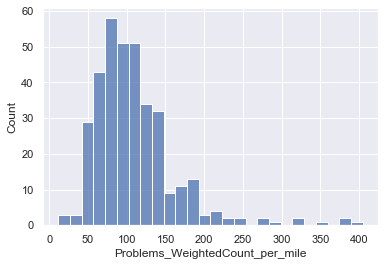

In [32]:
sns.histplot(data=sidewalk_per_bg_grouped, x="Problems_WeightedCount_per_mile")

In [33]:
sidewalk_per_bg_grouped.to_csv('SeattleData/SeattleNormalizedSidewalkLabelCounts_Problems_Latest.csv',index=False)

In [45]:
#s_clean.explore(column="CONDITION",tooltip="CONDITION", tiles="CartoDB positron", style_kwds =dict(opacity=0.5), cmap= "PiYG_r")

In [33]:
s_clean.head()

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry
0,1,328242,97,9309,SDW-30390,SDW,"BOREN AVE BETWEEN JEFFERSON ST AND JAMES ST, N...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,MONO,INSVC,2010-07-31,TR/PCC,60,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.3,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.226600,"LINESTRING (-122.32182 47.60587, -122.32237 47..."
1,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
2,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
3,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
4,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."


In [34]:
s_clean["CONDITION"].unique()

array(['GOOD', 'FAIR', 'EXCELLENT', None, 'POOR', 'VERY-POOR'],
      dtype=object)

In [35]:
s_clean["CONDITION"].value_counts(dropna=False)

GOOD         14208
FAIR         12910
NaN          11509
EXCELLENT     4234
POOR          2247
VERY-POOR      964
Name: CONDITION, dtype: int64

In [36]:
s_condition = s_clean.dropna(subset=["CONDITION"])

In [37]:
dict1 ={"EXCELLENT":"01_EXCELLENT", "GOOD":"02_GOOD", "FAIR": "03_FAIR", "POOR":"04_POOR", "VERY-POOR":"05_VERY-POOR"}
s_condition = s_condition.replace({"CONDITION": dict1})

In [38]:
s_condition

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry
0,1,328242,97,9309,SDW-30390,SDW,"BOREN AVE BETWEEN JEFFERSON ST AND JAMES ST, N...",SW DATA LOAD,2007-09-26,None,02_GOOD,2017-06-30,MONO,INSVC,2010-07-31,TR/PCC,60,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.3,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.226600,"LINESTRING (-122.32182 47.60587, -122.32237 47..."
1,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,03_FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
2,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,02_GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
3,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,02_GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
4,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,01_EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46180,46242,326436,97,6129,SDW-31758,SDW,"4TH AVE BETWEEN UNIVERSITY ST AND UNION ST, SW...",SW DATA LOAD,2007-09-26,None,02_GOOD,2017-06-15,G,INSVC,2010-07-31,PCC,52,None,150,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,3.0,3.3,0,2017-06-15,None,None,None,None,BLOCK,N,SSRP_C5_SWShim,379.150851,"LINESTRING (-122.33504 47.60822, -122.33585 47..."
46181,46243,326758,97,12199,SDW-30902,SDW,"PIKE ST BETWEEN 3RD AVE AND 4TH AVE, SE SIDE",SW DATA LOAD,2007-09-26,None,02_GOOD,2017-06-15,G,INSVC,2017-12-19,TR/PCC,118,None,128,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SE,PCC,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,3.0,3.0,0,2017-06-15,None,None,None,None,BLOCK,N,SSRP_C5_SWShim,275.864735,"LINESTRING (-122.33767 47.60973, -122.33671 47..."
46182,46244,326898,97,9579,SDW-45277,SDW,CALIFORNIA AVE SW BETWEEN SW HOLDEN ST AND SW ...,SW DATA LOAD,2007-09-26,None,02_GOOD,2017-06-21,410C,INSVC,2007-09-26,LSCP,42,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT1,None,N,None,3.0,1.2,0,2017-06-21,None,None,None,None,BLOCK,N,SSRP_SSW1_SWShim,203.316630,"LINESTRING (-122.38745 47.53357, -122.38746 47..."
46183,46245,326943,97,22064,SDW-30769,SDW,SW DAKOTA ST BETWEEN 55TH AVE SW AND 56TH AVE ...,SW DATA LOAD,2007-09-26,Non

In [39]:
s_condition_map = s_condition.explore(column="CONDITION",tooltip="CONDITION", tiles="CartoDB positron", style_kwds =dict(opacity=0.5), cmap= "PiYG_r")

In [43]:
#problems.explore(m=s_condition_map, tooltip="Label Type", tiles="CartoDB positron", style_kwds =dict(stroke=False, fillOpacity=0.2))

In [44]:
problems_map = problems.explore(m=s_condition_map, tooltip="Label Type", tiles="CartoDB positron", style_kwds =dict(stroke=False, fillOpacity=0.2))

In [46]:
#s_condition.explore(m = problems_map, column="CONDITION",tooltip="CONDITION", tiles="CartoDB positron", style_kwds =dict(opacity=0.5), cmap= "PiYG_r")

In [40]:
#sidewalk_per_bg.explore(column="Problems_WeightedCount", tooltip="Problems_WeightedCount",  tiles="CartoDB positron", style_kwds =dict(opacity=0.5), cmap= "PiYG_r", scheme="NaturalBreaks")

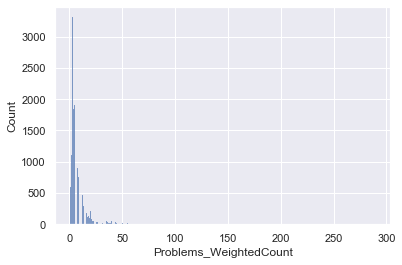

In [51]:
sns.histplot(data=sidewalk_per_bg, x="Problems_WeightedCount")

In [54]:
sidewalk_per_bg.sort_values(by=['Problems_WeightedCount'])

,OBJECTID_left,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng_left,geometry,Problems_WeightedCount,index_right,OBJECTID_right,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng_right,SHAPE_Area
4154,11289,295652,97,16144,SDW-8110,SDW,N PHINNEY WAY BETWEEN N 45TH ST AND AURORA AVE...,SW DATA LOAD,2007-09-26,None,FAIR,2017-08-03,410C,INSVC,2010-07-31,TR/PCC,72,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT6,None,N,None,3.0,4.3,0,2017-08-03,None,None,None,None,BLOCK,N,SSRP_NW4_SWShim,192.296366,"LINESTRING (-122.34770 47.66131, -122.34754 47...",1.0,175,176,004900,5,530330049005,Block Group 5,+47.6605204,-122.3505267,4900,4900.5,4900.5,46.545762,46.547735,0.000000,NaN,7239.275573,2.027533e+06
15749,35575,320670,97,20806,SDW-24811,SDW,S MCCLELLAN ST BETWEEN 21ST S AVE S AND 22ND A...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-28,410C,INSVC,2007-09-26,LSCP,108,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,3.0,1.6,0,2017-06-28,None,None,None,None,BLOCK,N,SSRP_C2_SWShim,194.855750,"LINESTRING (-122.30532 47.57830, -122.30453 47...",1.0,360,361,010002,3,530330100023,Block Group 3,+47.5782299,-122.3058147,10002,10002.3,10002.3,59.975597,59.978159,0.000000,NaN,7410.642239,2.612537e+06
15767,35842,321260,97,19452,SDW-26945,SDW,S BATEMAN ST BETWEEN 42ND AVE S AND 44TH AVE S...,SW DATA LOAD,2007-09-26,None,GOOD,2017-06-12,410C,INSVC,2007-09-26,LSCP,50,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,1.0,1.7,0,2017-06-12,None,None,None,None,BLOCK,N,SSRP_SSW2_SWShim,635.321535,"LINESTRING (-122.28078 47.54680, -122.27820 47...",1.0,372,373,010300,2,530330103002,Block Group 2,+47.5499028,-122.2782953,10300,10300.2,10300.2,75.204442,75.206029,0.000000,NaN,8974.934542,3.275905e+06
15750,35576,320671,97,20806,SDW-24812,SDW,S MCCLELLAN ST BETWEEN 21ST S AVE S AND 22ND A...,SW DATA LOAD,2007-09-26,None,GOOD,2017-06-28,410C,INSVC,2007-09-26,LSCP,108,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,3.0,0.2,0,2017-06-28,None,None,None,None,BLOCK,N,SSRP_C2_SWShim,194.855750,"LINESTRING (-122.30532 47.57841, -122.30453 47...",1.0,360,361,010002,3,530330100023,Block Group 3,+47.5782299,-122.3058147,10002,10002.3,10002.3,59.975597,59.978159,0.000000,NaN,7410.642239,2.612537e+06
7398,17533,302610,97,4087,SDW-9921,SDW,"27TH AVE W BETWEEN DEAD END 3 AND W ELMORE ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-07-19,410C,INSVC,2007-09-26,NONE,0,None,60,None,None,SR1146066,2021-08-27,PARK,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,1.0,5.3,0,2017-07-19,None,2021-08-27,None,None,BLOCK,N,SSRP_NW1_SWShim,436.213361,"LINESTRING (-122.39117 47.65647, -122.39110 47...",1.0,211,212,005801,3,530330058013,Block Group 3,+47.6553579,-122.3912139,5801,5801.3,5801.3,83.581627,83.586360,0.000000,NaN,8430.244670,3.640816e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,2874,331419,97,12125,SDW-36400,SDW,PERKINS LN W BETWEEN W RAYE ST AND W BERTONA S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,None,No

In [79]:
weird = problems.loc[problems['OBJECTID'] == 9186]

In [80]:
weird

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,latitude,longtitude,WeightedCount,Temporary,Agree Count,Disagree Count,Not Sure Count,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
12398,58871957,NoSidewalk,13939,41303958,Lawton Park,47.664703,-122.409510,5.0,False,0,0,0,POINT (-122.40951 47.66470),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,SW,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,192.304344
12400,58871968,NoSidewalk,17123,159553247,Lawton Park,47.664856,-122.409420,4.0,False,0,0,0,POINT (-122.40942 47.66486),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,SW,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,192.304344
12401,58871974,NoSidewalk,21032,334220043,Lawton Park,47.660290,-122.409320,5.0,False,0,0,0,POINT (-122.40932 47.66029),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,SW,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,192.304344
12403,58871976,NoSidewalk,17084,159547070,Lawton Park,47.660374,-122.408860,5.0,False,0,0,0,POINT (-122.40886 47.66037),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,SW,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,192.304344
12406,58871994,NoSidewalk,13939,41303958,Lawton Park,47.664722,-122.409730,2.0,False,0,0,0,POINT (-122.40973 47.66472),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,SW,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,192.304344
12427,58872080,NoSidewalk,21032,334220043,Lawton Park,47.660202,-122.410800,5.0,False,0,0,0,POINT (-122.41080 47.66020),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,SW,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,192.304344
12428,58872081,NoSidewalk,17126,159553366,Lawton Park,47.660824,-122.410450,5.0,False,0,0,0,POINT (-122.41045 47.66082),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,PARK,SW,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,2021-08-27,None,None,None,N,None,192.304344
12446,58872163,NoSidewalk,17126,159553366,Lawton Park,47.661083,-122.410820,5.0,False,0,0,0,POINT (-122.41082 47.66108),9185,9186,293825,97,11327,SDW-3874,SDW,LAWTONWOOD RD BETWEEN 40TH AVE W AND 42ND AVE ...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,SR1146066,2021-08-27,

In [12]:
weird.explore(tooltip={"Label Type","WeightedCount"})

NameError: name 'weird' is not defined

In [82]:
weird2 = sidewalk_w_labels.loc[sidewalk_w_labels['OBJECTID'] == 9186]

In [42]:
#weird2.explore(tooltip="Problems_WeightedCount")

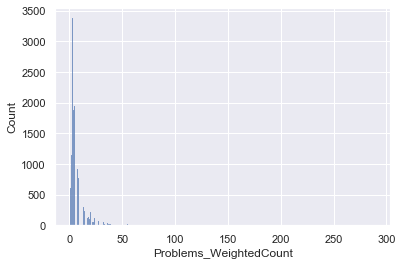

In [84]:
sns.histplot(data=sidewalk_w_labels, x="Problems_WeightedCount")

In [85]:
q = sidewalk_w_labels["Problems_WeightedCount"].quantile(0.99)

In [86]:
sidewalk_w_labels_clean = sidewalk_w_labels[sidewalk_w_labels["Problems_WeightedCount"] < q] 

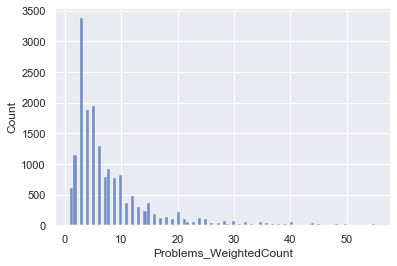

In [87]:
sns.histplot(data=sidewalk_w_labels_clean, x="Problems_WeightedCount")

In [43]:
#sidewalk_w_labels_clean.explore(column="Problems_WeightedCount", tooltip="Problems_WeightedCount",  tiles="CartoDB positron", style_kwds =dict(opacity=0.5), cmap= "PiYG_r", scheme="Quantiles")

In [23]:
#s_condition_map

In [30]:
p = problems.explore(tooltip="Label Type", tiles="CartoDB positron", style_kwds =dict(stroke=False, fillOpacity=0.5))

In [26]:
sidewalk_w_labels.head()

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry,Problems_WeightedCount
0,6,328249,97,13246,SDW-30395,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",60.0
1,7,328250,97,13246,SDW-30517,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,518.804925,"LINESTRING (-122.33537 47.55570, -122.33538 47...",52.0
2,30,328251,97,13245,SDW-43319,SDW,UTAH AVE S BETWEEN S HUDSON ST AND S DAWSON ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,602.328847,"LINESTRING (-122.33542 47.55738, -122.33521 47...",60.0
3,31,328252,97,13245,SDW-30518,SDW,UTAH AVE S BETWEEN S HUDSON ST AND S DAWSON ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,602.328825,"LINESTRING (-122.33558 47.55737, -122.33537 47...",64.0
4,32,328254,97,14403,SDW-43320,SDW,EAST MARGINAL WAY S BETWEEN S FIDALGO ST AND 1...,SW DATA LOAD,2007-09-26,None,VERY-POOR,2017-05-23,410C,INSVC,2007-09-26,NONE,0,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,E,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,3.0,2.2,19,2017-05-23,None,None,None,None,BLOCK,N,SSRP_SSW3_SWShim,442.863524,"LINESTRING (-122.33501 47.55011, -122.33440 47...",14.0


In [13]:
#sidewalk_w_labels.explore(m=p,tooltip="Problems_WeightedCount", tiles="CartoDB positron", color="orange")